# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you find **at least two datasets** on the web which are related, and that you visualize these datasets to answer the assignment question. You are free to utilize datasets with any location or domain, the usage of **Ann Arbor sports and athletics** datasets in the example is just a suggestion.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * You must state a question you are seeking to answer with your visualizations.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together as an example! [Example Solution File](./readonly/Assignment4_example.pdf)

# Título do projeto

Análise da Influência dos Presidentes do Brasil na Inflação (IPCA) e no Valor do Real Brasileiro (BRL) nas Últimas Duas Décadas

## Pergunta de pesquisa

Como tem sido a influência dos presidentes do Brasil nos principais indicadores econômicos, especificamente na inflação medida pelo Índice de Preços ao Consumidor Amplo (IPCA) e no valor da moeda brasileira (BRL)?

## Links para conjuntos de dados acessíveis ao público

http://www.ipeadata.gov.br/ExibeSerie.aspx?serid=38391

https://br.investing.com/currencies/usd-brl-historical-data

https://br.investing.com/currencies/eur-brl-historical-data

https://es.wikipedia.org/wiki/Anexo:Presidentes_de_Brasil

## Importar bibliotecas

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importar base de dados de IPCA (inflação)

In [67]:
df_ipca=pd.read_csv('IPCA.csv')
df_ipca.head()

,Data,IPCA(%)
0,2000.01,"7,70"
1,2000.02,"1,57"
2,2000.03,"2,67"
3,2000.04,"5,16"
4,2000.05,"0,12"


### Verificar dados vacios

In [68]:
print(df_ipca.isnull().sum())

Data       0
IPCA(%)    0
dtype: int64


- não tem dados faltantes

### Verificar tipos de dados

In [69]:
print(df_ipca.dtypes)
print('*'*60)
print(df_ipca.iloc[0])

Data       float64
IPCA(%)     object
dtype: object
************************************************************
Data       2000.01
IPCA(%)       7,70
Name: 0, dtype: object


- Tem que convertir a coluna Data a formato de datatime e a coluna IPCA a float
- Como o valor do IPCA é lançado o dia 15 de todo mes se vai a colocar o dia nada data

In [70]:
df_ipca['Data']=df_ipca['Data'].apply(lambda x: str(x)+'.15')

# Convertir 'Data' a formato de fecha
df_ipca['Data'] = pd.to_datetime(df_ipca['Data'], format='%Y.%m.%d')

# Convertir 'IPCA(%)' a tipo de dato float
df_ipca['IPCA(%)'] = df_ipca['IPCA(%)'].str.replace(',', '.').astype(float)

In [71]:
display(df_ipca.head())
print(df_ipca.dtypes)
print('*'*60)
print(df_ipca.iloc[0])

,Data,IPCA(%)
0,2000-01-15,7.70
1,2000-02-15,1.57
2,2000-03-15,2.67
3,2000-04-15,5.16
4,2000-05-15,0.12


Data       datetime64[ns]
IPCA(%)           float64
dtype: object
************************************************************
Data       2000-01-15 00:00:00
IPCA(%)                    7.7
Name: 0, dtype: object


## Importar base de dados de cotação USD-BRL

In [72]:
# Ler os arquivos CSV
df_usd_1 = pd.read_csv('USD_BRL Dados Históricos.csv')
df_usd_2 = pd.read_csv('USD_BRL Dados Históricos II.csv')
# Combinar os DataFrames
df_usd = pd.concat([df_usd_1, df_usd_2], ignore_index=True)
df_usd['USD-BRL']=df_usd['Último']
df_usd=df_usd[['Data', 'USD-BRL']]
df_usd

,Data,USD-BRL
0,06.03.2019,"3,8400"
1,05.03.2019,"3,7755"
2,04.03.2019,"3,7755"
3,01.03.2019,"3,7752"
4,28.02.2019,"3,7514"
...,...,...
6290,12.03.2019,"3,8114"
6291,11.03.2019,"3,8403"
6292,08.03.2019,"3,8669"
6293,07.03.2019,"3,8704"


### Verificar dados vacios

In [73]:
print(df_usd.isnull().sum())

Data       0
USD-BRL    0
dtype: int64


### Verificar tipos de dados

In [74]:
print(df_usd.dtypes)
print('*'*60)
print(df_usd.iloc[0])

Data       object
USD-BRL    object
dtype: object
************************************************************
Data       06.03.2019
USD-BRL        3,8400
Name: 0, dtype: object


- Tem que convertir a coluna Data a formato de datatime e a coluna USD-BRL a float

In [75]:
# Convertir 'Data' a formato de fecha
df_usd['Data'] = pd.to_datetime(df_usd['Data'], format='%d.%m.%Y')

# Convertir 'USD-BRL' a tipo de dato float
df_usd['USD-BRL'] = df_usd['USD-BRL'].str.replace(',', '.').astype(float)

In [76]:
display(df_usd.head())
print(df_usd.dtypes)
print('*'*60)
print(df_usd.iloc[0])

,Data,USD-BRL
0,2019-03-06,3.8400
1,2019-03-05,3.7755
2,2019-03-04,3.7755
3,2019-03-01,3.7752
4,2019-02-28,3.7514


Data       datetime64[ns]
USD-BRL           float64
dtype: object
************************************************************
Data       2019-03-06 00:00:00
USD-BRL                   3.84
Name: 0, dtype: object


## Importar base de dados de cotação EUR-BRL

In [77]:
# Ler os arquivos CSV
df_eur_1=pd.read_csv('EUR_BRL Dados Históricos.csv')
df_eur_2=pd.read_csv('EUR_BRL Dados Históricos II.csv')
# Combinar os DataFrames
df_eur = pd.concat([df_eur_1, df_eur_2], ignore_index=True)
df_eur['EUR-BRL']=df_eur['Último']
df_eur=df_eur[['Data', 'EUR-BRL']]
df_eur

,Data,EUR-BRL
0,06.03.2019,"4,3419"
1,05.03.2019,"4,2694"
2,04.03.2019,"4,2812"
3,01.03.2019,"4,2948"
4,28.02.2019,"4,2657"
...,...,...
6295,12.03.2019,"4,3022"
6296,11.03.2019,"4,3185"
6297,08.03.2019,"4,3465"
6298,07.03.2019,"4,3324"


### Verificar dados vacios

In [78]:
print(df_eur.isnull().sum())

Data       0
EUR-BRL    0
dtype: int64


### Verificar tipos de dados

In [79]:
print(df_eur.dtypes)
print('*'*60)
print(df_eur.iloc[0])

Data       object
EUR-BRL    object
dtype: object
************************************************************
Data       06.03.2019
EUR-BRL        4,3419
Name: 0, dtype: object


- Tem que convertir a coluna Data a formato de datatime e a coluna EUR-BRL a float

In [80]:
# Convertir 'Data' a formato de fecha
df_eur['Data'] = pd.to_datetime(df_eur['Data'], format='%d.%m.%Y')

# Convertir 'EUR-BRL' a tipo de dato float
df_eur['EUR-BRL'] = df_eur['EUR-BRL'].str.replace(',', '.').astype(float)

In [81]:
display(df_eur.head())
print(df_eur.dtypes)
print('*'*60)
print(df_eur.iloc[0])

,Data,EUR-BRL
0,2019-03-06,4.3419
1,2019-03-05,4.2694
2,2019-03-04,4.2812
3,2019-03-01,4.2948
4,2019-02-28,4.2657


Data       datetime64[ns]
EUR-BRL           float64
dtype: object
************************************************************
Data       2019-03-06 00:00:00
EUR-BRL                 4.3419
Name: 0, dtype: object


## Presidentes

In [115]:
# Crear un diccionario con la información
data = {
    'Presidente': ['Fernando Henrique Cardoso', 'Lula da Silva', 'Dilma', 'Demer', 'Jair Bolsonaro', 'Lula da Silva'],
    'Inicio': ['1995-01-01', '2003-01-01', '2011-01-01', '2016-08-31', '2019-01-01', '2023-01-01'],
    'Fin': ['2002-12-31', '2010-12-31', '2016-08-31', '2018-12-31', '2022-12-31', '2026-12-31']
}

# Crear un DataFrame
df_presidentes = pd.DataFrame(data)

# Convertir las columnas de fechas a objetos datetime
df_presidentes['Inicio'] = pd.to_datetime(df_presidentes['Inicio'])
df_presidentes['Fin'] = pd.to_datetime(df_presidentes['Fin'], errors='coerce')
df_presidentes

,Presidente,Inicio,Fin
0,Fernando Henrique Cardoso,2000-01-01,2002-12-31
1,Lula da Silva,2003-01-01,2010-12-31
2,Dilma,2011-01-01,2016-08-31
3,Demer,2016-08-31,2018-12-31
4,Jair Bolsonaro,2019-01-01,2022-12-31
5,Lula da Silva,2023-01-01,2024-02-01


## Unir los 3 datasets

In [82]:
df_eur=df_eur.set_index('Data')
df_ipca=df_ipca.set_index('Data')
df_usd=df_usd.set_index('Data')

In [94]:
cotacoes=df_ipca.merge(df_usd, on='Data')
cotacoes=cotacoes.merge(df_eur, on='Data')
display(cotacoes)
print(cotacoes.describe())

,IPCA(%),USD-BRL,EUR-BRL
Data,,,
2000-02-15,1.57,1.7765,1.7435
2000-03-15,2.67,1.7400,1.6835
2000-05-15,0.12,1.8235,1.6626
2000-06-15,2.80,1.8110,1.7284
2000-08-15,16.90,1.8035,1.6461
...,...,...,...
2023-08-15,2.80,4.9845,5.4351
2023-09-15,3.17,4.8663,5.1851
2023-11-15,3.41,4.8620,5.2733


          IPCA(%)     USD-BRL     EUR-BRL
count  206.000000  206.000000  206.000000
mean     6.147087    2.984604    3.483776
std      5.313048    1.195780    1.263212
min     -7.860000    1.574600    1.574300
25%      3.170000    2.022600    2.561300
50%      5.530000    2.599300    3.174850
75%      8.340000    3.717200    4.231125
max     42.910000    5.855400    6.719800


## Pandas Visualization

<Figure size 1000x600 with 0 Axes>

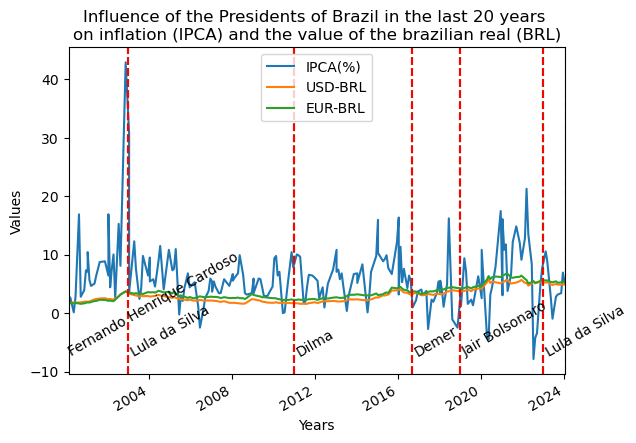

In [138]:
plt.figure(figsize=(10,6))
cotacoes.plot()
plt.xlabel('Years')
plt.ylabel('Values')
plt.title('''Influence of the Presidents of Brazil in the last 20 years 
on inflation (IPCA) and the value of the brazilian real (BRL)''')
plt.legend()

# Añadir líneas verticales para delimitar los mandatos presidenciales
for i, row in df_presidentes.iterrows():
    plt.axvline(x=row['Inicio'], color='r', linestyle='--', label=row['Presidente'] + ' - Start')
    if not pd.isnull(row['Fin']):
        plt.axvline(x=row['Fin'], color='g', linestyle='--', label=row['Presidente'] + ' - End')
    
# Ajustar los límites del eje x
plt.xlim(cotacoes.index.min(), cotacoes.index.max())


# Agregar etiquetas de presidente en el eje x
for i, row in df_presidentes.iterrows():
    plt.text(row['Inicio'], cotacoes.min().min(), row['Presidente'], rotation=30, ha='left', va='bottom')

# # Crear una leyenda separada para identificar a los presidentes
# legend_presidentes = plt.legend(title='Presidents', loc='upper left')
# for line in legend_presidentes.get_lines():
#     line.set_linestyle('--')
# plt.gca().add_artist(legend_presidentes)
    
# # Agregar etiquetas de presidente en el gráfico
# for i, row in df_presidentes.iterrows():
#     plt.text(row['Inicio'], cotacoes.min().min(), row['Presidente'], rotation=45, ha='left', va='bottom', bbox=dict(boxstyle='round,pad=0.3', edgecolor='blue', facecolor='white'))


# # Agregar anotaciones de presidente en el gráfico
# for i, row in df_presidentes.iterrows():
#     plt.annotate(row['Presidente'], xy=(row['Inicio'], cotacoes.max().max()), xytext=(50, -100),
#                  textcoords='offset points', rotation=45, ha='right', va='bottom', color='blue')


plt.show()

### Justificativa de como o visual aborda a questão de pesquisa

- Eixo vertical: Mostra o percentual de inflação (IPCA) e o valor de USD-BRL e EUR-BRL.

- Eixo horizontal: Mostra os anos de 2002 a 2024, divididos pela presidência de cada presidente.

- Linhas:

IPCA: A linha vermelha mostra a taxa anual de inflação no Brasil durante o período de análise. Observa-se uma tendência geral descendente, com alguns picos em 2003, 2015 e 2020.
USD-BRL: A linha azul mostra o valor do dólar americano em reais brasileiros. Observa-se uma tendência geral ascendente, com alguns picos em 2002, 2008 e 2015.
EUR-BRL: A linha verde mostra o valor do euro em reais brasileiros. Uma tendência semelhante é observada no USD-BRL, com uma tendência geral ascendente e alguns picos em 2002, 2008 e 2015.

- Presidências:

Fernando Henrique Cardoso (1995-2002): Durante seu mandato foi observado um aumento significativo da inflação, obtendo o maior pico neste período analisado. O valor do real brasileiro desvalorizou significativamente em relação ao dólar norte-americano.

Luiz Inácio Lula da Silva (2003-2010): A inflação permaneceu baixa durante seu primeiro mandato, mas depois começou a subir novamente. O valor do real brasileiro se valorizou em relação ao dólar norte-americano.

Dilma Rousseff (2011-2016): A inflação aumentou consideravelmente durante o seu mandato, atingindo um pico de mais de 10% ao ano em 2015. O valor do real brasileiro desvalorizou significativamente em relação ao dólar americano.

Michel Temer (2016-2018): A inflação voltou a cair durante seu mandato. O valor do real brasileiro valorizou-se ligeiramente em relação ao dólar norte-americano.

Jair Bolsonaro (2019-2022): A inflação permaneceu relativamente baixa durante seu mandato, mas o valor do real brasileiro desvalorizou significativamente em relação ao dólar americano.

Luiz Inácio Lula da Silva (2023-presente): É muito cedo para avaliar o impacto do seu mandato na inflação e no valor do real brasileiro.

No geral, a imagem mostra que a inflação e o valor do real brasileiro foram influenciados por uma série de fatores, incluindo as políticas económicas implementadas por cada presidente.
É importante ressaltar que a imagem fornece apenas uma visão geral do tema. Para uma análise mais detalhada, são necessárias pesquisas adicionais.


### Princípios do Cairo na imagem

Veracidade:

- Dados: A imagem apresenta dados precisos sobre a inflação (IPCA) e o valor do real brasileiro (BRL) e do EUR-BRL nos últimos 20 anos.
- Clareza: O gráfico é fácil de ler e entender. Os eixos estão claramente identificados e as linhas são diferenciadas por cores.
- Precisão: Os dados utilizados para criação da imagem foram obtidos de fontes confiáveis ​​como o Banco Central do Brasil.

Beleza:

- Simplicidade: O design da imagem é simples e minimalista, facilitando a compreensão da mensagem.
- Elegância: A combinação de cores e a tipografia agradam aos olhos.
- Equilíbrio: Os elementos da imagem estão bem equilibrados e distribuídos uniformemente.

Funcionalidade:

- Comunicação: A imagem transmite efetivamente informações sobre a influência dos presidentes do Brasil na inflação e no valor do real brasileiro.
- Utilidade: A imagem pode ser utilizada para diversos fins, como apresentações, reportagens ou publicações em redes sociais.
- Acessibilidade: A imagem é acessível a pessoas com diferentes habilidades, inclusive pessoas com daltonismo.

Entendimento:

- Informação: A imagem fornece informações que não são evidentes à primeira vista. Por exemplo, a imagem mostra que a inflação tende a diminuir no longo prazo, apesar de alguns picos.
- Interpretação: A imagem permite ao usuário interpretar a informação de diferentes maneiras. Por exemplo, alguns usuários podem focar na inflação, enquanto outros podem focar no valor do real brasileiro.
- Reflexão: A imagem convida à reflexão sobre o impacto das políticas econômicas na economia brasileira.

Opções de design:

- Tipografia: Foi utilizada uma tipografia sem serifa legível e moderna.
- Cores: Foi utilizada uma paleta de cores neutras e profissionais.
- Design: O design é minimalista e centrado em dados.

Conclusão:

A imagem está em conformidade com os princípios do Cairo, apresentando informações precisas e verdadeiras de uma forma bonita, funcional e perspicaz. A imagem pode ser usada para comunicar informações complexas de uma forma fácil de entender.